In [1]:
import tensorflow as tf
import layers
from tensorflow.keras.layers import Input, MaxPooling2D,Conv2DTranspose, concatenate, Cropping2D, UpSampling2D
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def unet():
    input_layer = Input(shape = (572, 572, 3))
    rep_1 = layers.ConvRepeat(64, 3)(input_layer)
    x = MaxPooling2D(padding = 'same')(rep_1)
    rep_2 = layers.ConvRepeat(128, 3)(x)
    x = MaxPooling2D(padding = 'same')(rep_2)
    rep_3 = layers.ConvRepeat(256, 3)(x)
    x = MaxPooling2D(padding = 'same')(rep_3)
    rep_4 = layers.ConvRepeat(512, 3)(x)
    x = MaxPooling2D(padding = 'same')(rep_4)
    rep_5 = layers.ConvRepeat(1024, 3)(x)

    tp_1 = Conv2DTranspose(512, 2, 2, padding = 'same', activation = 'relu')(rep_5)
    c_c1 = Cropping2D(cropping = ((4, 4), (4, 4)))(rep_4)
    x = concatenate([c_c1, tp_1], axis = 3)
    x = layers.ConvRepeat(512, 3)(x)

    tp_2 = Conv2DTranspose(256, 2, 2, padding = 'same', activation = 'relu')(x)
    c_c2 = Cropping2D(cropping = ((16, 16), (16, 16)))(rep_3)
    x = concatenate([c_c2, tp_2], axis = 3)
    x = layers.ConvRepeat(256, 3)(x)

    tp_3 = Conv2DTranspose(128, 2, 2, padding = 'same', activation = 'relu')(x)
    c_c3 = Cropping2D(cropping = ((40, 40), (40, 40)))(rep_2)
    x = concatenate([c_c3, tp_3], axis = 3)
    x = layers.ConvRepeat(128, 3)(x)

    tp_4 = Conv2DTranspose(64, 2, 2, padding = 'same', activation = 'relu')(x)
    c_c4 = Cropping2D(cropping = ((88, 88), (88, 88)))(rep_1)
    x = concatenate([c_c4, tp_4], axis = 3)
    x = layers.ConvRepeat(64, 3)(x)

    output = layers.ConvSingle(2, 1, padding = 'same')(x)
    return tf.keras.Model(input_layer, output)

In [4]:
mdl = unet()
mdl.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 572, 572,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_repeat_9       │ (None, 568, 568,  │     39,232 │ input_layer_10[0… │
│ (ConvRepeat)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 284, 284,  │          0 │ conv_repeat_9[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_repeat_10      │ (None, 280, 280,  │    222,464 │ max_pooling2d_4[… │
│ (ConvRepeat)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 140, 140,  │          0 │ conv_repeat_10[0… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_repeat_11      │ (None, 136, 136,  │    887,296 │ max_pooling2d_5[… │
│ (ConvRepeat)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 68, 68,    │          0 │ conv_repeat_11[0… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_repeat_12      │ (None, 64, 64,    │  3,544,064 │ max_pooling2d_6[… │
│ (ConvRepeat)        │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 32, 32,    │          0 │ conv_repeat_12[0… │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_repeat_13      │ (None, 28, 28,    │ 14,166,016 │ max_pooling2d_7[… │
│ (ConvRepeat)        │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cropping2d_4        │ (None, 56, 56,    │          0 │ conv_repeat_12[0… │
│ (Cropping2D)        │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_4  │ (None, 56, 56,    │  2,097,664 │ conv_repeat_13[0… │
│ (Conv2DTranspose)   │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 56, 56,    │          0 │ cropping2d_4[0][… │
│ (Concatenate)       │ 1024)             │            │ conv2d_transpose… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_repeat_14      │ (None, 52, 52,    │  7,083,008 │ concatenate_4[0]… │
│ (ConvRepeat)        │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cropping2d_5        │ (None, 104, 104,  │          0 │ conv_repeat_11[0… │
│ (Cropping2D)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_5  │ (None, 104, 104,  │    524,544 │ conv_repeat_14[0… │
│ (Conv2DTranspose)   │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_5       │ (None, 104, 104,  │          0 │ cropping2d_5[0][

 Total params: 31,055,362 (118.47 MB)

 Trainable params: 31,043,586 (118.42 MB)

 Non-trainable params: 11,776 (46.00 KB)

In [78]:
(train_data, test_data), info = tfds.load('oxford_iiit_pet', split = ['train', 'test'], with_info = True)

In [79]:
for i in train_data:
    im = i['image']
    mask = i['segmentation_mask']

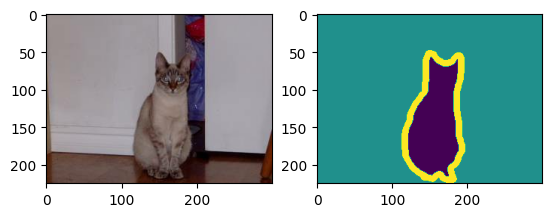

In [80]:
fig, axs = plt.subplots(1, 2)
ax = axs.ravel()

ax[0].imshow(im)
ax[1].imshow(mask)
plt.show()

In [81]:
BATCH_SIZE = 32

In [82]:
def norm(ims, masks):
    ims = tf.cast(ims, tf.float32) / 255
    masks -= 1
    return ims, masks

def resize(data):
    ims = tf.image.resize(data['image'], (572, 572))
    masks = tf.image.resize(data['segmentation_mask'], (388, 388))

    ims, masks = norm(ims, masks)

    return ims, masks

In [83]:
train_data = train_data.map(resize).batch(BATCH_SIZE)

In [77]:
# mdl.compile(optimizer = 'Adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['Accuracy'])
# mdl.fit(train_data, epochs = 10, batch_size = BATCH_SIZE)

Epoch 1/10
